# Comparison between the temperatures of finite with nv**2 eigvals and all eigvals


In [1]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
from isingchat import style
from isingchat.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


## get data

In [6]:
# get temperature for regular infinite
data_path = Path("../../data/regular/finite-size/p_1.9").resolve()
file = 'exp_p-1.9_all_eigs_max_cv.csv'
df_finite_allEigs = pd.read_csv(os.path.join(data_path,file),index_col=0)
# get temperature for regular finite
file = 'exp_p-1.9_max_cv.csv'
df_finite = pd.read_csv(os.path.join(data_path,file),index_col=0)

In [12]:
df_finite.loc['inv_temp_at_max_Cv'].values[:9]

array([0.59958992, 0.56097561, 0.54967777, 0.54010554, 0.54096195,
       0.54225166, 0.54441489, 0.54615795, 0.54835253])

In [29]:
list(map(int, df_finite.columns))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

## begin plots

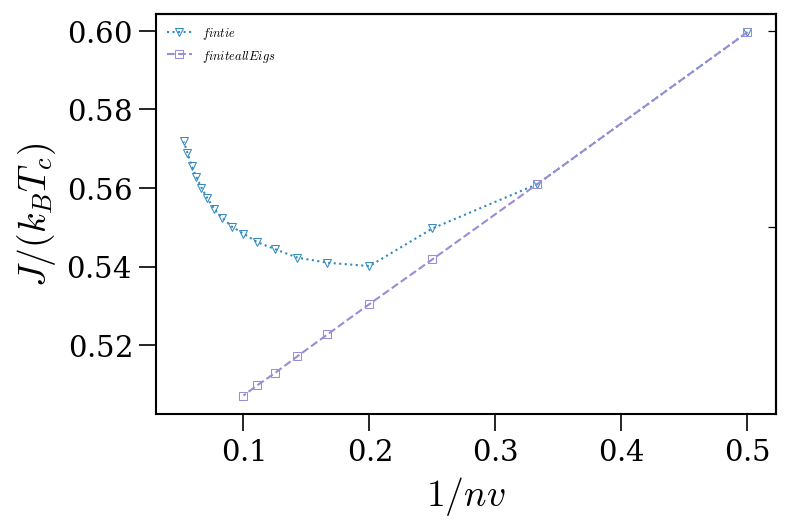

In [38]:
# Load the default style.
style.use("default")
# rcParams["text.usetex"] = False
markers = ["o","v","s","P","p","*","h","D","X","8"]
line_styles = ["solid","dotted","dashed","dashdot",
               (0,(1,1)),(0,(5,1)),(0,(3,1,1,1)),(0,(3,1,1,1,1,1)),(0,(1,10)),(0,(5,10)),(0,(3,10,1,10))]

# fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
fig1: Figure = pyplot.figure(figsize=(12*(4/9), 12), dpi=150)

grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])


# ---- Set plots ---- #

x_data_finite = 1/np.array(list(map(int, df_finite.columns)))
y_data_finite = df_finite.loc['inv_temp_at_max_Cv'].values
x_data_finite_allEigs = 1/np.array(list(map(int, df_finite_allEigs.columns)))
y_data_finite_allEigs = df_finite_allEigs.loc['inv_temp_at_max_Cv'].values

ax.plot(x_data_finite, y_data_finite, marker=markers[1],
               color='C'+str(1),
               mfc='none',
               mew=0.5,
               lw=1,
               linestyle=line_styles[1],
               label = r"${}$".format(r'fintie')
           )
ax.plot(x_data_finite_allEigs, y_data_finite_allEigs, marker=markers[2],
               color='C'+str(2),
               mfc='none',
               mew=0.5,
               lw=1,
               linestyle=line_styles[2],
               label = r"${}$".format(r'finite allEigs')
           )

# ---- Configurations plots ---- #
# Set major ticks for x axis
major_xticks = np.arange(1, 2, 0.2)

# Set minor ticks for x axis
minor_xticks = np.arange(1, 2, 0.1)

# Set major ticks for y axis
major_yticks = np.arange(0, 1, 0.25)

# Set minor ticks for y axis
minor_yticks = np.arange(0, 1, 0.05)

# ticks configuration
# ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14) 

# ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(14) 

# labels configurations
ax.xaxis.label.set_size(18)
ax.set_xlabel(r"$1/nv$")

ax.yaxis.label.set_size(18)
ax.set_ylabel(r"$J/(k_BT_c)$")
# ax.axvline(x=1,linestyle='--')

# ax.set_ylim(0,0.6)
# ax.set_xlim(0, 0.5)

ax.legend(
          loc ="upper left",
          fontsize = 6,
          frameon=False
)

# ticks for the top axes
ax.tick_params(which='both',top=False,right=False)
ax.tick_params(which='minor',size=4)
ax.tick_params(which='major',size=8)
ax2 = ax.secondary_xaxis('top')
ax2.tick_params(which='both',direction='in',labeltop=False)
ax2.tick_params(which='minor',size=4)
ax2.tick_params(which='major',size=8)
ax2.set_ticks(major_xticks)
ax2.set_ticks(minor_xticks, minor=True)

# ticks for the right axes
ax3 = ax.secondary_yaxis('right')
ax3.tick_params(which='both',direction='in',labelright=False)
ax3.tick_params(which='minor',size=4)
ax3.tick_params(which='major',size=8)
ax3.set_ticks(major_yticks)
ax3.set_ticks(minor_yticks,minor=True)

pyplot.draw()
pyplot.show()